<h1 align="center"><font face = "Times New Roman" size = "80">JPEG Compression</font></h1>
<h2 align="center"><font face = "Times New Roman" size = ""> Information theory and coding</font></h2>
<h3 align="center"><font face = "Times New Roman"> Fall 2019</font></h3>
<h6 align="center"><font face = "Times New Roman"">Alaa Mohamed Roshdy&nbsp 201600031</font></h6>
<h6 align="center"><font face = "Times New Roman">Mohamed Adham Mahrous&nbsp 201601078</font></h6>
<h6 align="center"><font face = "Times New Roman">Mohamed Mostafa Hamed&nbsp 201600236</font></h6>
<h6 align="center"><font face = "Times New Roman">Mohamed Kasem Saber&nbsp 201601144</font></h6>


---



In [0]:
import numpy as np
import pandas as pd
from PIL import Image
import encoder as e
import main as m

In [2]:
# Download desired image
!wget 'https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/joker-1568899702.jpg?crop=0.514xw:0.771xh;0.168xw,0.0733xh&resize=480:*'
! mv 'joker-1568899702.jpg?crop=0.514xw:0.771xh;0.168xw,0.0733xh&resize=480:*' 'joker.jpg'

--2019-11-02 15:46:08--  https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/joker-1568899702.jpg?crop=0.514xw:0.771xh;0.168xw,0.0733xh&resize=480:*
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35809 (35K) [image/jpeg]
Saving to: ‘joker-1568899702.jpg?crop=0.514xw:0.771xh;0.168xw,0.0733xh&resize=480:*’

joker-1568899702.jp 100%[===================>]  34.97K  --.-KB/s    in 0.007s  

2019-11-02 15:46:08 (4.80 MB/s) - ‘joker-1568899702.jpg?crop=0.514xw:0.771xh;0.168xw,0.0733xh&resize=480:*’ saved [35809/35809]



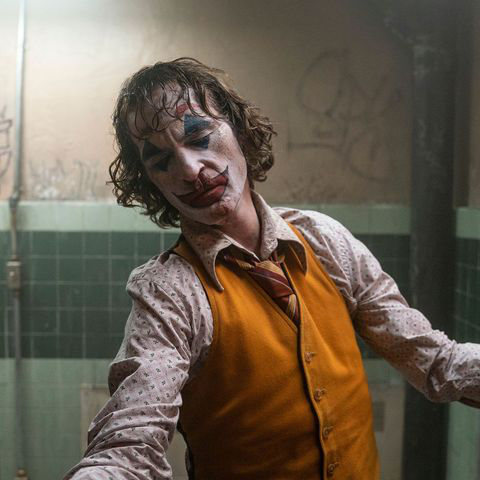

In [3]:
# Display the image
im = Image.open('joker.jpg')
im


In [0]:
def rmse(im, reconstructed_image):
  """
    Gets the RMSE of 2 images
    Args:
         im (numpy array) : The original image
         reconstructed_image (numpy ndarray): The reconstructed image
    Returns:
        rmse: root mean squared error as a metric to compare between the original image and the reconstructed
  """
  error = im - reconstructed_image
  mse = np.sum(np.square(error)) / (im.shape[0] * im.shape[1])
  rmse = np.square(mse)

  return rmse




---


<h2 align="center"><font face = "Times New Roman">JPEG compression</font></h3>


In [0]:
# Define block size
box_size = 8
reconstructed = []
operations = []

# Apply 8 x 8 compression using low compression quantization table
#high.start_counters([events.PAPI_FP_OPS,])
huffcoded, code_dict, n_rows, n_columns = m.encode(im, box_size, m.table_8_low)
reconstructed.append( m.decode(huffcoded, code_dict,  n_rows, n_columns, box_size, m.table_8_low))
#operations.append( high.stop_counters() )

# Apply 8 x 8 compression using high compression quantization table
huffcoded, code_dict, n_rows, n_columns = m.encode(im, box_size, m.table_8_high)
reconstructed.append( m.decode(huffcoded, code_dict,  n_rows, n_columns, box_size, m.table_8_high) )


box_size = 16
# Apply 16 x 16 compression using low compression quantization table
#high.start_counters([events.PAPI_FP_OPS,])
huffcoded, code_dict, n_rows, n_columns = m.encode(im, box_size, m.table_16_low)
reconstructed.append( m.decode(huffcoded, code_dict,  n_rows, n_columns, box_size, m.table_16_low))
#operations.append( high.stop_counters() )

# Apply 16 x 16 compression using high compression quantization table
huffcoded, code_dict, n_rows, n_columns = m.encode(im, box_size, m.table_16_high)
reconstructed.append( m.decode(huffcoded, code_dict,  n_rows, n_columns, box_size, m.table_16_high))




---


<h2 align="center"><font face = "Times New Roman">Comparison</font></h2>
<h3 align="left"><font face = "Times New Roman">Qualitative comparison</font></h2>


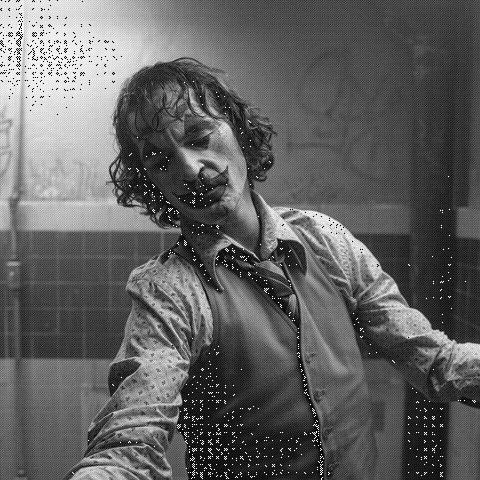

In [7]:
Image.fromarray(reconstructed[0])

<h3 align="left"><font face = "Times New Roman">Quantitative comparison</font></h2>

In [9]:
# Amount of compression achieved
imarr = e.reshape_image(im)

size_before = imarr.size * imarr.itemsize 
print("Size in bytes of image before compression: ", size_before)

comp_ratio = []
for i in range(len(reconstructed)):
  comp_ratio.append((reconstructed[i].size * reconstructed[i].itemsize)/size_before)
  

##################################################
# Number of floating point operations
#print("The number of floating point operations\n For the 8x8 block sized compression: ", operations[0],
#      "\nFor 16x16 block sized compression: ", operations[1])

##################################################


# Quality of compressed image (RMSE)

rms_error =[]
for i in range(len(reconstructed)):
  rms_error.append(rmse(imarr, reconstructed[i]))


# Print results
comp_type = ["8x8 low", "8x8 high", "16x16 low", "16x16 high",]
# intialise data of lists.
data = {'compression type':comp_type,
        'compression ratio':comp_ratio,
#        "# of flops": y,
        'RMSE': rms_error}
 
# Create DataFrame
df = pd.DataFrame(data)
 
# Print the output.
print(df)

Size in bytes of image before compression:  230400
  compression type  compression ratio          RMSE
0          8x8 low                1.0   4859.119219
1         8x8 high                1.0  11040.660766
2        16x16 low                1.0   7979.760501
3       16x16 high                1.0  11123.118903






---


<h2 align="center"><font face = "Times New Roman"> Division of work amongst team members</font></h2>




